**Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import os, zipfile, re, cv2, glob
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19
import warnings
warnings.filterwarnings('ignore')

**Resizing images and saving them in drive**

In [ ]:
original_folder = '/content/drive/MyDrive/projects/folder/glacier/'
resized_folder = '/content/drive/MyDrive/projects/folder_resized/'

os.makedirs(resized_folder, exist_ok=True)

start_index = 0
end_index = 999

original_folder_name = os.path.basename(os.path.normpath(original_folder))

for i, filename in enumerate(os.listdir(original_folder)[start_index:end_index + 1]):
    img_path = os.path.join(original_folder, filename)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    base, ext = os.path.splitext(filename)

    if not ext:
        print(f"Skipped {filename} - no valid extension")
        continue

    new_filename = f"{original_folder_name}{i + 1}.jpg"

    new_img_path = os.path.join(resized_folder, new_filename)

    img.save(new_img_path, format='JPEG')

**Counting the number of resized images**

In [ ]:
resized_folder = '/content/drive/MyDrive/projects/folder_resized/'

path, dirs, files = next(os.walk(resized_folder))
file_count = len(files)
print('Total number of resized images: ', file_count)

Total number of resized images:  2000


**Printing image names**

In [ ]:
file_names = os.listdir('/content/drive/MyDrive/projects/folder_resized/')
print(file_names)

['glacier1.jpg', 'glacier2.jpg', 'glacier3.jpg', 'glacier4.jpg', 'glacier5.jpg', 'glacier6.jpg', 'glacier7.jpg', 'glacier8.jpg', 'glacier9.jpg', 'glacier10.jpg', 'glacier11.jpg', 'glacier12.jpg', 'glacier13.jpg', 'glacier14.jpg', 'glacier15.jpg', 'glacier16.jpg', 'glacier17.jpg', 'glacier18.jpg', 'glacier19.jpg', 'glacier20.jpg', 'glacier21.jpg', 'glacier22.jpg', 'glacier23.jpg', 'glacier24.jpg', 'glacier25.jpg', 'glacier26.jpg', 'glacier27.jpg', 'glacier28.jpg', 'glacier29.jpg', 'glacier30.jpg', 'glacier31.jpg', 'glacier32.jpg', 'glacier33.jpg', 'glacier34.jpg', 'glacier35.jpg', 'glacier36.jpg', 'glacier37.jpg', 'glacier38.jpg', 'glacier39.jpg', 'glacier40.jpg', 'glacier41.jpg', 'glacier42.jpg', 'glacier43.jpg', 'glacier44.jpg', 'glacier45.jpg', 'glacier46.jpg', 'glacier47.jpg', 'glacier48.jpg', 'glacier49.jpg', 'glacier50.jpg', 'glacier51.jpg', 'glacier52.jpg', 'glacier53.jpg', 'glacier54.jpg', 'glacier55.jpg', 'glacier56.jpg', 'glacier57.jpg', 'glacier58.jpg', 'glacier59.jpg', 'glac

**Converting image names to string format for necessary preprocessing**

In [ ]:
type (file_names)
file_names = str (file_names)
type (file_names)

str

**Preprocessing of image names**

In [ ]:
pattern = r'[0-9]'

file_names = re.sub(pattern, '', file_names)

file_names = file_names.replace("'", "").replace(".","").replace("jpg","").replace("_","").replace("() ()","").replace("()","").replace("resized","").replace("''", "")

file_names = file_names.replace(" ,", ",")

file_names = file_names.replace("forest ", "forest").replace("glacier ", "glacier")

file_names = file_names.strip('][').split(', ')

print("file_names", file_names)
print(type(file_names))

file_names ['glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier', 'glacier'

**Making a dataframe of the image names**

In [ ]:
y = pd.DataFrame(data = file_names)
y.head(5)

,0
0,glacier
1,glacier
2,glacier
3,glacier
4,glacier


**Renaming the column of target variable's dataframe**

In [ ]:
y.rename(columns = {0:'y'}, inplace = True)

**Encoding variable names**

In [ ]:
y.replace ({'y': {'forest':0, "glacier":1}}, inplace = True)

**Converting the images to numpy arrays**

In [ ]:
image_directory = '/content/drive/MyDrive/projects/folder_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

natural_images = np.asarray([cv2.imread(file) for file in files])
print (natural_images.shape, type(natural_images))

(2000, 224, 224, 3) <class 'numpy.ndarray'>


**Assigning variable names to dependent and independent features**

In [ ]:
x = natural_images
y = np.asarray(y)

**Making train, test and validation splits**

In [ ]:
x_train_old, x_test = train_test_split(x, test_size=0.2, random_state=2)
x_train, x_val = train_test_split(x_train_old, test_size=0.2, random_state=2)

y_train_old, y_test = train_test_split(y, test_size=0.2, random_state=2)
y_train, y_val = train_test_split(y_train_old, test_size=0.2, random_state=2)

**Scaling the data**

In [ ]:
x_train_scaled = x_train/255

x_test_scaled = x_test/255

x_val_scaled = x_val/255

**Converting numpy array to 2d format**

In [ ]:
x_train_scaled_2d = x_train_scaled.reshape(x_train_scaled.shape[0], -1)

# Create a DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled_2d)
x_train_scaled_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,0.529412,0.458824,0.345098,0.411765,0.341176,0.227451,0.380392,0.313725,0.211765,0.380392,...,0.078431,0.329412,0.219608,0.082353,0.329412,0.223529,0.078431,0.329412,0.223529,0.078431
1,0.258824,0.274510,0.231373,0.239216,0.254902,0.211765,0.266667,0.290196,0.247059,0.329412,...,0.192157,0.258824,0.196078,0.200000,0.258824,0.200000,0.192157,0.243137,0.184314,0.176471
2,0.898039,0.862745,0.823529,0.898039,0.862745,0.823529,0.898039,0.862745,0.823529,0.901961,...,0.462745,0.498039,0.498039,0.474510,0.494118,0.494118,0.470588,0.482353,0.482353,0.458824


**Downloading and initializing VGG19 model**

In [ ]:
pretrained_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 [==============================] - 3s 0us/step


**Freezing the pre-trained layers**

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False

**Building the neural network and tweaking its settings according to our requirements**

In [ ]:
model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 26447682 (100.89 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


**Introducing early stopping to avoid overfitting**

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

**Model training**

In [ ]:
model.fit(x_train_scaled, y_train, validation_data = (x_val_scaled, y_val), epochs=1000, batch_size=4, callbacks=early_stopping)

Epoch 1/1000
320/320 [==============================] - 27s 53ms/step - loss: 0.3108 - accuracy: 0.9453 - val_loss: 0.7929 - val_accuracy: 0.8875
Epoch 2/1000
320/320 [==============================] - 16s 51ms/step - loss: 0.1231 - accuracy: 0.9758 - val_loss: 0.1766 - val_accuracy: 0.9719
Epoch 3/1000
320/320 [==============================] - 17s 52ms/step - loss: 0.0278 - accuracy: 0.9953 - val_loss: 0.2050 - val_accuracy: 0.9688
Epoch 4/1000
320/320 [==============================] - 15s 46ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.1275 - val_accuracy: 0.9781
Epoch 5/1000
320/320 [==============================] - 17s 55ms/step - loss: 0.0029 - accuracy: 0.9984 - val_loss: 0.1831 - val_accuracy: 0.9750
Epoch 6/1000
320/320 [==============================] - 17s 54ms/step - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.1377 - val_accuracy: 0.9812
Epoch 7/1000
320/320 [==============================] - 17s 53ms/step - loss: 2.3527e-04 - accuracy: 1.0000 - val_loss: 0.16

**Model evaluation**

In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc*100)

13/13 [==============================] - 8s 337ms/step - loss: 0.0523 - accuracy: 0.9875
Test Loss = 0.05234219506382942
Test Accuracy = 98.7500011920929


**Saving the trained model**

In [ ]:
model.save('vgg19_model.h5')

**Loading the trained model**

In [ ]:
# Load the saved model
loaded_model = load_model('vgg19_model.h5')

**Taking user input and making predictions from the trained model**

Path of the image to be predicted: /content/drive/MyDrive/projects/20059.jpg


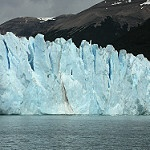

1/1 [==============================] - 1s 789ms/step
It is a glacier


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = loaded_model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
if input_pred_label == 0:
  print ('It is a forest')
elif input_pred_label == 1:
  print ('It is a glacier')